In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import pairwise_distances

from pp_mix.simulation.conditional_mh import ConditionalMH
from pp_mix.simulation.birth_death import BirthDeathMH

# Conditional MH

### Poisson Process on [0, 1]

In [ ]:
def papangelou(csi, x, log=True):
    out = np.sum(stats.beta.logpdf(csi, 0.5, 0.5))
    if not log:
        out = np.exp(out)
    return out


def proposal_rng(state, ind):
    return stats.multivariate_normal.rvs(mean=state[ind, :], cov=0.1*np.eye(2))


def proposal_dens(x, prev_state, ind, log=True):
    out = stats.multivariate_normal.logpdf(
        x[ind], mean=prev_state[ind, :], cov=0.1*np.eye(2))
    if not log:
        out = np.exp(out)
    return out

In [ ]:
npoints = 30
init_state = np.random.uniform(size=npoints*2).reshape(npoints, 2)

In [ ]:
mh = ConditionalMH(npoints, papangelou, proposal_rng, proposal_dens)
chain = mh.run(1000, 1000, init_state)

In [ ]:
ind = 10
plt.scatter(chain[ind, :, 0], chain[ind, :, 1])

### Strauss process

In [ ]:
gamma = 0.1
R = 0.3
scale = 0.2


def papangelou(csi, x, log=True):
    dists = pairwise_distances(x, csi.reshape(1, -1))
    out = np.log(gamma) * np.sum(dists <= R)
    if not log:
        out = np.exp(out)
    return out

def proposal_rng(state, ind):
    mean = state[ind, :]
    a = (0 - mean) / scale
    b = (1 - mean) / scale

    return stats.truncnorm.rvs(a, b, loc=mean, scale=scale)


def proposal_dens(x, prev_state, ind, log=True):
    mean = prev_state[ind, :]
    a = (0 - mean) / scale
    b = (1 - mean) / scale
    
    out = np.sum(stats.truncnorm.logpdf(x[ind, :], a, b, loc=mean, scale=scale))
    if not log:
        out = np.exp(out)
    return out

In [ ]:
npoints = 10
init_state = np.random.uniform(size=npoints*2).reshape(npoints, 2)

In [ ]:
mh = ConditionalMH(npoints, papangelou, proposal_rng, proposal_dens)
chain = mh.run(1000, 1000, init_state)

In [ ]:
ind = 905
plt.scatter(chain[ind, :, 0], chain[ind, :, 1])

# Birth and Death MH

### Poisson Process

In [2]:
def papangelou(csi, x, log=True):
    out = np.sum(stats.beta.logpdf(csi, 0.5, 0.5))
    if not log:
        out = np.exp(out)
    return out


def update_proposal_rng(state, ind):
    return stats.multivariate_normal.rvs(mean=state[ind, :], cov=0.1*np.eye(2))

def update_proposal_dens(x, prev_state, ind, log=True):
    out = stats.multivariate_normal.logpdf(
        x[ind], mean=prev_state[ind, :], cov=0.1*np.eye(2))
    if not log:
        out = np.exp(out)
    return out


def birth_proposal_rng(state):
    mean = np.array([0.5, 0.5])
    a = (0 - mean) / 0.5
    b = (1 - mean) / 0.5

    return stats.truncnorm.rvs(a, b, loc=mean, scale=0.5)


def birth_proposal_dens(x, state, log=True):
    mean = np.array([0.5, 0.5])
    a = (0 - mean) / 0.5
    b = (1 - mean) / 0.5
    
    out = np.sum(stats.truncnorm.logpdf(x, a, b, loc=mean, scale=0.5))
    if not log:
        out = np.exp(out)
    return out

In [3]:
npoints = 100
init_state = np.random.uniform(size=npoints*2).reshape(npoints, 2)

In [4]:
bdmh = BirthDeathMH(papangelou, birth_proposal_rng, birth_proposal_dens,
                    update_proposal_rng, update_proposal_dens)

chains = bdmh.run(1000, 1000, init_state)

death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
de

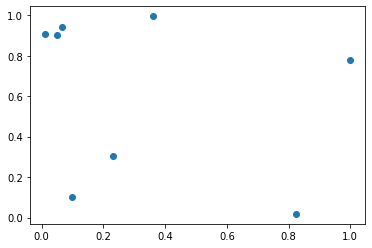

In [5]:
index = 900
plt.scatter(chains[index][:, 0], chains[index][:, 1])

## Strauss Process

In [6]:
gamma = 0.9
R = 0.1
scale = 0.2


def papangelou(csi, x, log=True):
    dists = pairwise_distances(x, csi.reshape(1, -1))
    out = np.log(gamma) * np.sum(dists <= R)
    if not log:
        out = np.exp(out)
    return out


def papangelou(csi, x, log=True):
    out = np.sum(stats.beta.logpdf(csi, 0.5, 0.5))
    if not log:
        out = np.exp(out)
    return out


def update_proposal_rng(state, ind):
    return stats.multivariate_normal.rvs(mean=state[ind, :], cov=0.1*np.eye(2))

def update_proposal_dens(x, prev_state, ind, log=True):
    out = stats.multivariate_normal.logpdf(
        x[ind], mean=prev_state[ind, :], cov=0.1*np.eye(2))
    if not log:
        out = np.exp(out)
    return out


def birth_proposal_rng(state):
    mean = np.array([0.5, 0.5])
    a = (0 - mean) / 0.5
    b = (1 - mean) / 0.5

    return stats.truncnorm.rvs(a, b, loc=mean, scale=0.5)


def birth_proposal_dens(x, state, log=True):
    mean = np.array([0.5, 0.5])
    a = (0 - mean) / 0.5
    b = (1 - mean) / 0.5
    
    out = np.sum(stats.truncnorm.logpdf(x, a, b, loc=mean, scale=0.5))
    if not log:
        out = np.exp(out)
    return out

In [7]:
npoints = 100
init_state = np.random.uniform(size=npoints*2).reshape(npoints, 2)

In [14]:
bdmh = BirthDeathMH(papangelou, birth_proposal_rng, birth_proposal_dens,
                    update_proposal_rng, update_proposal_dens)

chains = bdmh.run(10000, 10000, init_state)

death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
deat

birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
birt 

birt move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death mov

death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
death move accepted
death move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted
birt move accepted
death move accepted
birt 

death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
death move accepted
death move accepted
birt move accepted
birt move accepted
birt move accepted


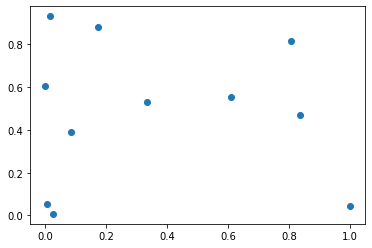

In [17]:
index = 7630
plt.scatter(chains[index][:, 0], chains[index][:, 1])

(array([1075., 1649., 2039., 2013., 1582.,  847.,  322.,  205.,  171.,
          97.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

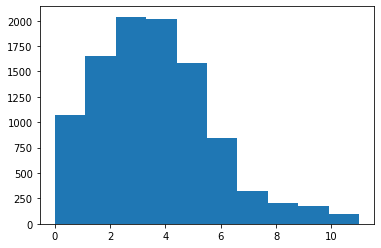

In [15]:
nums = np.array([x.shape[0] for x in chains])
plt.hist(nums)

In [16]:
np.argmax(nums)

7630